In [1]:
import xarray as xr
import numpy as np
#import math
from math import atan2, pi
import datetime
def data_ones(x):
    x_new=x/x
    x_new=x_new.fillna(0)
    return x_new
dir_data = 'F:/data/sat_data/oscar/L4/oscar_third_deg/'

In [2]:
#make oscar monthly data, change latitue and longitude to lat and lon, group by month
#dir_data = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/oscar/preview/L4/oscar_third_deg/'
for lyr in range(2017,2019): #2017):
    filename = dir_data + 'oscar_vel' + str(lyr).zfill(4) + '.nc'
    ds=xr.open_dataset(filename,drop_variables=['um','vm'])
    ds_month = ds.resample(time='M').mean(keep_attrs=True,skipna=False)    
    ds_month = ds_month.rename({'longitude':'lon','latitude':'lat'})
    ds.close()
    ds_month = ds_month.sel(depth=15).drop('year').drop('depth')
    ds_month['spd']=(ds_month.u**2+ds_month.v**2)**.5
    ds_month['dir']=np.arctan2(ds_month.v,ds_month.u)* 180./pi
    ds_month.to_netcdf(dir_data + 'monthly/' + str(lyr) + 'monthly_data_oscar.nc')
#check that yes, resampling is averaging for center of month
#ds_month.u[0,0,450,900].data
#ds.u[0:7,0,450,900].mean()

In [3]:
ds_month

<xarray.Dataset>
Dimensions:  (lat: 481, lon: 1201, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2018-12-31
  * lat      (lat) float64 80.0 79.67 79.33 79.0 ... -79.0 -79.33 -79.67 -80.0
  * lon      (lon) float64 20.0 20.33 20.67 21.0 ... 419.0 419.3 419.7 420.0
Data variables:
    u        (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    v        (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    spd      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    dir      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    VARIABLE:       Ocean Surface Currents
    DATATYPE:       1/72 YEAR Interval
    DATASUBTYPE:    unfiltered
    GEORANGE:       20 to 420 -80 to 80
    PERIOD:         Jan.01,2018 to Dec.26,2018
    year:           2018
    description:    OSCAR Third Degree Sea Surface Velocity
    CREATION_DATE:  03:39 30-Jan-2019
    version:        2009.0
    sou

In [4]:
#make monthly climatology, need to drop 'year' coordinate value for mean to work right
for lyr in range(1993,2019):
    filename = dir_data + 'monthly/' + str(lyr) + 'monthly_data_oscar.nc'
    ds=xr.open_dataset(filename)
#    ds2 = ds.drop('year').sel(depth=15.0)  #drop year index and depth index
    ds2 = ds #.sel(depth=15.0)  #drop year index and depth index
    if lyr==1993:
        ds_clim = ds2
    else:
        ds_clim = xr.concat([ds_clim,ds2],dim = 'time')
    ds.close()
ds_clim2 = ds_clim.groupby('time.month').mean('time',keep_attrs=True,skipna=False)
ds_clim2.attrs['PERIOD']='Jun 01, 1993 to Dec 26 2018'
ds_clim2.to_netcdf(dir_data + 'climatology_1993_2018_monthly_data_oscar.nc')


In [5]:
lyr=2017
filename = dir_data + '/monthly/' + str(lyr) + 'monthly_data_oscar.nc'
ds=xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:  (lat: 481, lon: 1201, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-31 2017-02-28 ... 2017-12-31
  * lat      (lat) float64 80.0 79.67 79.33 79.0 ... -79.0 -79.33 -79.67 -80.0
  * lon      (lon) float64 20.0 20.33 20.67 21.0 ... 419.0 419.3 419.7 420.0
Data variables:
    u        (time, lat, lon) float64 ...
    v        (time, lat, lon) float64 ...
    spd      (time, lat, lon) float64 ...
    dir      (time, lat, lon) float64 ...
Attributes:
    VARIABLE:       Ocean Surface Currents
    DATATYPE:       1/72 YEAR Interval
    DATASUBTYPE:    unfiltered
    GEORANGE:       20 to 420 -80 to 80
    PERIOD:         Jan.01,2017 to Dec.26,2017
    year:           2017
    description:    OSCAR Third Degree Sea Surface Velocity
    CREATION_DATE:  03:24 05-Apr-2018
    version:        2009.0
    source:         Gary Lagerloef, ESR (lager@esr.org) and Kathleen Dohan, E...
    contact:        Kathleen Dohan (kdohan@esr.org) or John T. Gunn (g

In [21]:
#make monthly climatology, need to drop 'year' coordinate value for mean to work right
for lyr in range(2000,2019):
    filename = dir_data + '/monthly/' + str(lyr) + 'monthly_data_oscar.nc'
    ds=xr.open_dataset(filename)
#    ds2 = ds.drop('year').sel(depth=15.0)  #drop year index and depth index
    ds2 = ds #.sel(depth=15.0)  #drop year index and depth index
    if lyr==2000:
        ds_clim = ds2
    else:
        ds_clim = xr.concat([ds_clim,ds2],dim = 'time')
    ds.close()
ds_clim2 = ds_clim.groupby('time.month').mean('time',keep_attrs=True,skipna=False)
ds_clim2.attrs['PERIOD']='Jun 01, 2000 to Dec 26 2018'
ds_clim2.to_netcdf(dir_data + 'climatology/climatology_2000_2018_monthly_data_oscar.nc')


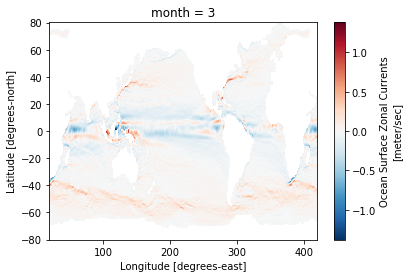

In [26]:
ds_clim2.u[2,:,:].plot()

In [31]:
tem2 = ds_clim2.sel(lat=slice(57,54.5),lon=slice(-158+360,-148+360)).mean({'lat','lon'})
tem = ds_clim.sel(lat=slice(57,54.5),lon=slice(-158+360,-148+360)).mean({'lat','lon'})


<xarray.DataArray 'v' ()>
array(-0.036579) <xarray.DataArray 'v' ()>
array(-0.033179)


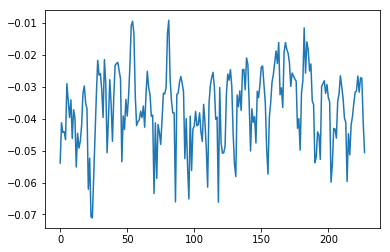

In [44]:
import matplotlib.pyplot as plt
#tem2.u.plot()
plt.plot(tem.v)
print(tem.v.mean(),tem2.v.mean())

In [7]:
print(dir_data)
ds_clim2=xr.open_dataset(dir_data + '/climatology/climatology_2000_2018_monthly_data_oscar.nc')


F:/data/sat_data/oscar/L4/oscar_third_deg/


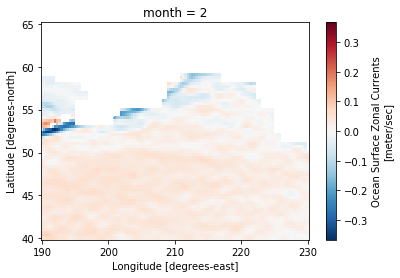

In [5]:
subset = ds_clim2.sel(lat=slice(65,40),lon=slice(190,230))
#print(subset)
subset.u[1,:,:].plot()